In [16]:
##Part 1.1

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!kaggle datasets download -d allen-institute-for-ai/CORD-19-research-challenge --file metadata.csv


Dataset URL: https://www.kaggle.com/datasets/allen-institute-for-ai/CORD-19-research-challenge
License(s): other
 91% 511M/560M [00:02<00:00, 160MB/s]
100% 560M/560M [00:02<00:00, 198MB/s]


In [11]:
!unzip metadata.csv.zip


Archive:  metadata.csv.zip
  inflating: metadata.csv            


In [15]:
import pandas as pd
df = pd.read_csv('metadata.csv', encoding='latin-1')



/tmp/ipython-input-1777122795.py:2: DtypeWarning: Columns (1,4,5,6,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('metadata.csv', encoding='latin-1')


In [14]:
df.head()

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN


1.2 Basic data exploration

In [18]:
# Check dimensions
print(f"DataFrame shape: {df.shape}")




DataFrame shape: (1056660, 19)


In [19]:
# Check data types
print(df.dtypes)


cord_uid             object
sha                  object
source_x             object
title                object
doi                  object
pmcid                object
pubmed_id            object
license              object
abstract             object
publish_time         object
authors              object
journal              object
mag_id              float64
who_covidence_id     object
arxiv_id             object
pdf_json_files       object
pmc_json_files       object
url                  object
s2_id               float64
dtype: object


In [20]:

# Check for missing values
print(df.isnull().sum())


cord_uid                  0
sha                  682894
source_x                  0
title                   503
doi                  399880
pmcid                667089
pubmed_id            557728
license                   0
abstract             235544
publish_time           1814
authors               23869
journal               87322
mag_id              1056660
who_covidence_id     573725
arxiv_id            1042411
pdf_json_files       682894
pmc_json_files       740918
url                  369726
s2_id                 80192
dtype: int64


In [21]:

# Generate basic statistics for numerical columns
print(df.describe())

       mag_id         s2_id
count     0.0  9.764680e+05
mean      NaN  2.175871e+08
std       NaN  5.312281e+07
min       NaN  9.600000e+01
25%       NaN  2.211411e+08
50%       NaN  2.320829e+08
75%       NaN  2.373948e+08
max       NaN  2.491936e+08


Part 2: Data Cleaning and Preparation

In [22]:
# Identify columns with many missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0].sort_values(ascending=False))


mag_id              1056660
arxiv_id            1042411
pmc_json_files       740918
sha                  682894
pdf_json_files       682894
pmcid                667089
who_covidence_id     573725
pubmed_id            557728
doi                  399880
url                  369726
abstract             235544
journal               87322
s2_id                 80192
authors               23869
publish_time           1814
title                   503
dtype: int64


In [23]:
df.columns

Index(['cord_uid', 'sha', 'source_x', 'title', 'doi', 'pmcid', 'pubmed_id',
       'license', 'abstract', 'publish_time', 'authors', 'journal', 'mag_id',
       'who_covidence_id', 'arxiv_id', 'pdf_json_files', 'pmc_json_files',
       'url', 's2_id'],
      dtype='object')

In [33]:
df['pubmed_id'].unique()

array(['11472636', '11667967', '11667972', ..., 32794685.0, 32691131.0,
       32801351.0], dtype=object)

In [34]:
cols_to_drop = ['mag_id', 'arxiv_id', 'pmc_json_files', 'sha', 'pdf_json_files',
                'pmcid', 'who_covidence_id', 'pubmed_id']
df.drop(columns=cols_to_drop, inplace=True)


In [35]:
df.head()

,cord_uid,source_x,title,doi,license,abstract,publish_time,authors,journal,url,s2_id
0,ug7v899j,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN
1,02tnwd4m,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
2,ejv2xln0,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
3,2b73a28n,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
4,9785vg6d,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN


In [49]:
# ------------------------
#  Fill missing basic metadata
# ------------------------
df['journal'] = df['journal'].fillna('Unknown')
df['abstract'] = df['abstract'].fillna('No abstract')
df['authors'] = df['authors'].fillna('Unknown')

# ------------------------
# 2️ Convert publish_time to datetime
# ------------------------
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')

# ------------------------
# 3️ Drop rows with missing titles
# ------------------------
df = df.dropna(subset=['title'])

# ------------------------
# 4️ Remove duplicates based on DOI or title
# ------------------------
df = df.drop_duplicates(subset=['doi', 'title'], keep='first')
df = df.dropna(subset=['publish_time'])

# ------------------------
# 5: Clean text fields
# ------------------------
df['abstract'] = df['abstract'].str.replace('\n', ' ').str.strip()
df['title'] = df['title'].str.strip()
df['authors'] = df['authors'].str.strip()
df['journal'] = df['journal'].str.strip()

# ------------------------
# 6️ Keep only essential columns for analysis
# ------------------------
df_clean = df[['cord_uid', 'title', 'abstract', 'authors', 'journal', 'publish_time', 'doi', 'url']]


In [50]:
# If you want to keep all rows for NLP
df_clean = df[['cord_uid', 'title', 'abstract', 'authors', 'journal', 'publish_time', 'doi', 'url']]

# Missing counts
print(df_clean.isna().sum())


cord_uid            0
title               0
abstract            0
authors             0
journal             0
publish_time        0
doi             14224
url                 0
dtype: int64


Part 3: Data Analysis and Visualization (3-4 hours)

In [53]:
df_clean = df[df['title'].notna()]
df_clean['publish_time'] = pd.to_datetime(df_clean['publish_time'], errors='coerce')  # Warning


In [54]:
df_clean['publish_year'] = df_clean['publish_time'].dt.year


In [55]:
df_clean['abstract_word_count'] = df_clean['abstract'].apply(lambda x: len(str(x).split()))


Part 2: Basic Analysis

In [57]:
# Keep only papers published from 2019 onward
df_clean = df_clean[df_clean['publish_year'] >= 2019]

# Recalculate papers per year
papers_per_year = df_clean.groupby('publish_year').size().sort_index()
print(papers_per_year)


publish_year
2019      5611
2020    162551
2021    218379
2022     85238
2023         1
2024         1
dtype: int64


2.2 Top journals publishing COVID-19 research

In [59]:
top_journals = df_clean['journal'].value_counts().head(10)
print(top_journals)


journal
Unknown                            33783
bioRxiv                             8729
Int J Environ Res Public Health     8155
PLoS One                            5610
Reactions Weekly                    3698
Sci Rep                             3680
Front Psychol                       3263
BMJ                                 2993
Cureus                              2958
Front Immunol                       2529
Name: count, dtype: int64


2.3 Most frequent words in titles

In [60]:
from collections import Counter
import re

# Combine all titles
all_titles = " ".join(df_clean['title'].dropna().astype(str)).lower()
words = re.findall(r'\b\w+\b', all_titles)
word_freq = Counter(words)
most_common_words = word_freq.most_common(20)
print(most_common_words)


[('of', 323238), ('and', 251050), ('in', 240966), ('the', 239714), ('19', 192977), ('covid', 182693), ('a', 166255), ('for', 96067), ('to', 77458), ('with', 77193), ('on', 57533), ('2', 56859), ('pandemic', 53369), ('sars', 47788), ('during', 46613), ('cov', 46544), ('patients', 44562), ('study', 38773), ('from', 33509), ('health', 32132)]


**Visualizations**

3.1 Publications over time

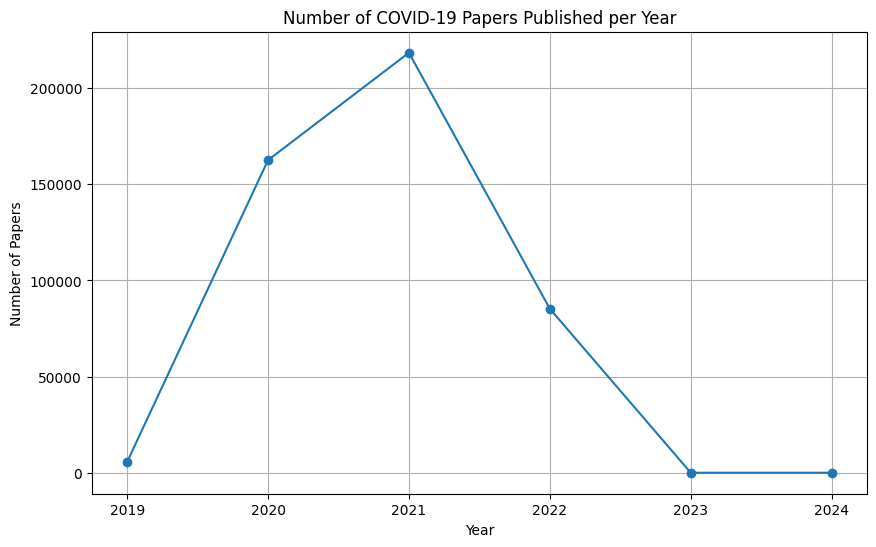

In [61]:
plt.figure(figsize=(10,6))
papers_per_year.plot(kind='line', marker='o')
plt.title("Number of COVID-19 Papers Published per Year")
plt.xlabel("Year")
plt.ylabel("Number of Papers")
plt.grid(True)
plt.show()

Bar chart of top journals

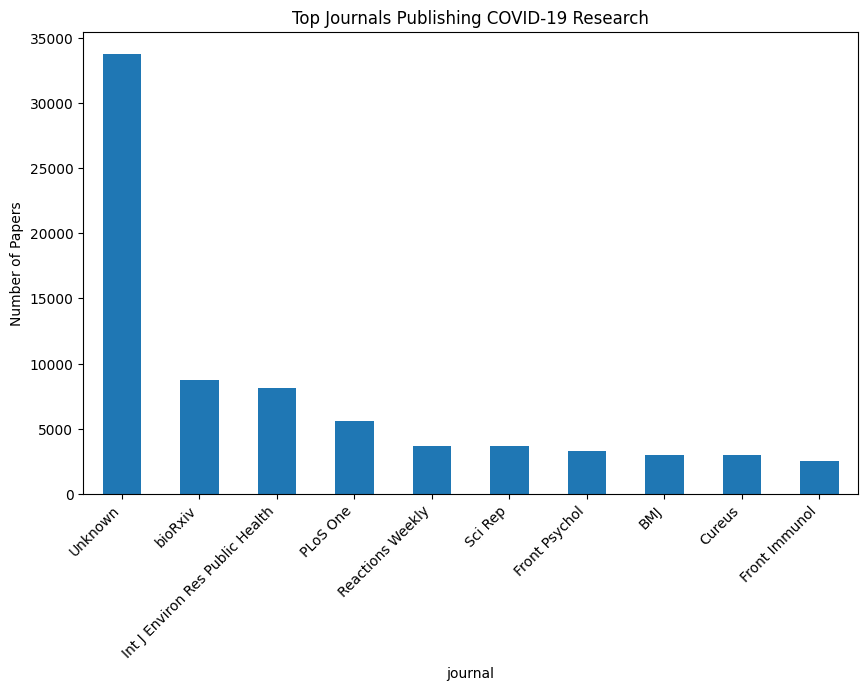

In [62]:
plt.figure(figsize=(10,6))
top_journals.plot(kind='bar')
plt.title("Top Journals Publishing COVID-19 Research")
plt.ylabel("Number of Papers")
plt.xticks(rotation=45, ha='right')
plt.show()


Word cloud of titles

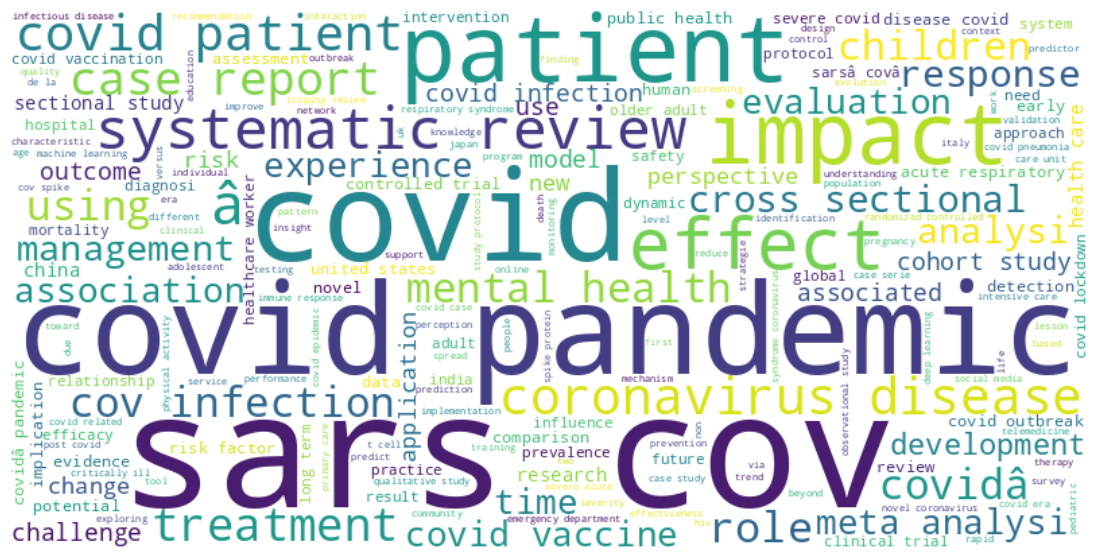

In [63]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_titles)
plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


Distribution of papers by source

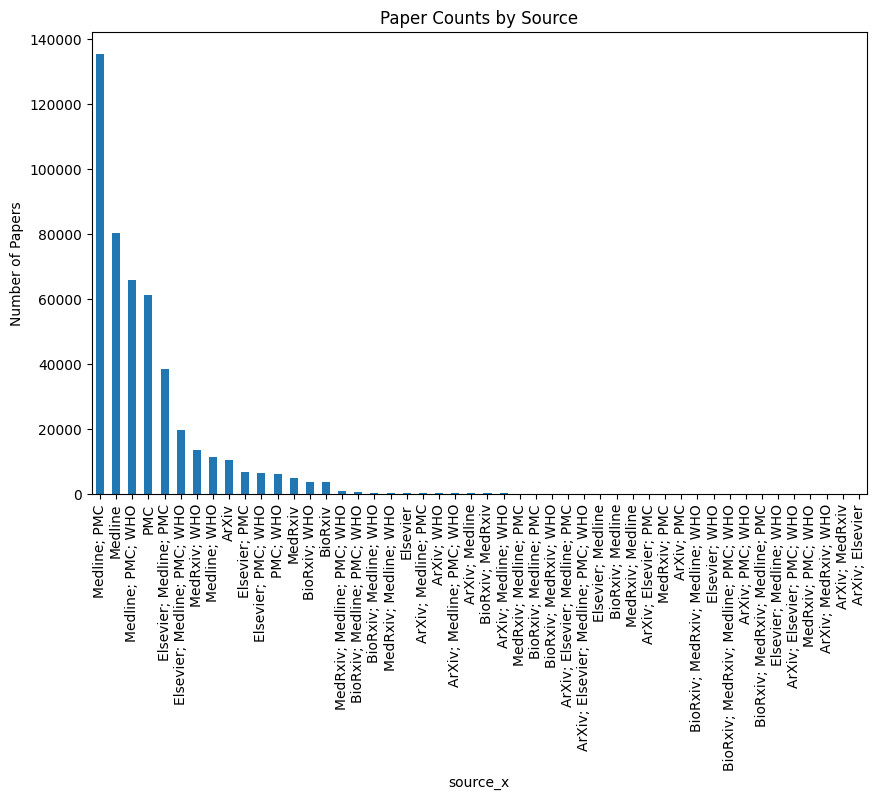

In [64]:
plt.figure(figsize=(10,6))
df_clean['source_x'].value_counts().plot(kind='bar')
plt.title("Paper Counts by Source")
plt.ylabel("Number of Papers")
plt.show()


In [66]:
!ngrok authtoken 2Itb8FHmuiz5b2Hvle8RSDcwKWK_6emfpgreivJj2fA8jcKNE


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [69]:
from pyngrok import ngrok

# Use explicit parameters to avoid YAML parsing errors
public_url = ngrok.connect(addr="8501", proto="http")
print(f"Streamlit app live at: {public_url}")


Streamlit app live at: NgrokTunnel: "https://14ffc8b96fcc.ngrok-free.app" -> "http://localhost:8501"


In [70]:
!streamlit run app.py &




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.86.136.93:8501

  Stopping...
